In [151]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
import sklearn.metrics as metrics
from datetime import datetime

## **1. Преобразование данные**:

### *1а. Проверка* наличия пропущенных значений. Заполнение

In [152]:
df = pd.read_csv('athletes.csv')


In [153]:
df.head(2)

,id,name,nationality,sex,dob,height,weight,sport,gold,silver,bronze
0,736041664,A Jesus Garcia,ESP,male,10/17/69,1.72,64.0,athletics,0,0,0
1,532037425,A Lam Shin,KOR,female,9/23/86,1.68,56.0,fencing,0,0,0


In [154]:
df.shape

(11538, 11)

In [155]:
df.groupby('sex').sum()[['gold', 'silver', 'bronze']]

,gold,silver,bronze
sex,,,
female,318,317,331
male,348,338,373


In [156]:
#Пропуски в следующих столбцах
df_null = df[['dob',	'height',	'weight']].isnull().sum()
df_null

,0
dob,1
height,330
weight,659


In [157]:
# У данного ID три пропуска. Удаляю данную позицию
df.loc[df['dob'].isnull()]

,id,name,nationality,sex,dob,height,weight,sport,gold,silver,bronze
8546,663676373,Pavel Sozykin,RUS,male,NaN,NaN,NaN,sailing,0,0,0


In [158]:
df.dropna(axis=0, thresh=9, inplace=True)

In [159]:
#Персоны с мин.ростом
df.loc[df['height']==np.min(df['height'])]

,id,name,nationality,sex,dob,height,weight,sport,gold,silver,bronze
7846,817788274,Nancy Chepkwemoi,KEN,female,10/8/93,1.21,47.0,athletics,0,0,0


In [160]:
#Персоны с мин.весом
df.loc[df['weight']==np.min(df['weight'])]

,id,name,nationality,sex,dob,height,weight,sport,gold,silver,bronze
3429,777180519,Flavia Saraiva,BRA,female,9/30/99,1.33,31.0,gymnastics,0,0,0


In [161]:
# Статистика до заполнения пропусков
df.groupby('sex').agg({'height': ('mean', 'std'), 'weight': ('mean', 'std')})

height               weight           
            mean       std       mean        std
sex                                             
female  1.699984  0.088130  62.644427  11.251259
male    1.820965  0.100817  80.100800  15.384161

In [162]:
# Заполнение пустот с ипользованием среднего значения по полу
df['height'] = df['height'].fillna(df.groupby('sex')['height'].transform('mean'))

In [163]:
df['weight'] = df['weight'].fillna(df.groupby('sex')['weight'].transform('mean'))

In [164]:
# Статистика после заполнения пропусков
df.groupby('sex').agg({'height': ('mean', 'std'), 'weight': ('mean', 'std')})

height               weight           
            mean       std       mean        std
sex                                             
female  1.699984  0.086945  62.644427  11.034039
male    1.820965  0.099293  80.100800  14.815990

In [169]:
# Рабочий вариант!
shift=lambda x: x-100 if 2 < x % 100 < 69 else x
df['dob_year']=df['dob'].apply(lambda x: shift(pd.to_datetime(x, format='%m/%d/%y', yearfirst=True).year))

In [ ]:
df['dob_year'].value_counts()

In [16]:
"""Мой вариант:
Конвертация Даты Рождения в формат numpy.int64 (год рождения). Если старше x/x/69, то переобразутся как 2069 и старше. Всего  80
df['dob_year'] = df['dob'].apply(lambda x: pd.to_datetime(x, format='%m/%d/%y', yearfirst=True).year)"""

In [20]:
df.head(3)

,id,name,nationality,sex,dob,height,weight,sport,gold,silver,bronze,dob_year
0,736041664,A Jesus Garcia,ESP,male,10/17/69,1.72,64.0,athletics,0,0,0,1969
1,532037425,A Lam Shin,KOR,female,9/23/86,1.68,56.0,fencing,0,0,0,1986
2,435962603,Aaron Brown,CAN,male,5/27/92,1.98,79.0,athletics,0,0,1,1992


### 1б. Закодируйте категориальные переменные числовыми значениями по необходимости.

In [18]:
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder


In [19]:
LE = LabelEncoder()
OHE = OneHotEncoder()

In [20]:
df['Y'] = LE.fit_transform(df['sex'])
df.head(2)

,id,name,nationality,sex,dob,height,weight,sport,gold,silver,bronze,dob_year,Y
0,736041664,A Jesus Garcia,ESP,male,10/17/69,1.72,64.0,athletics,0,0,0,1969,1
1,532037425,A Lam Shin,KOR,female,9/23/86,1.68,56.0,fencing,0,0,0,1986,0


In [21]:
df['sport'].nunique()

28

In [22]:
#x=OHE.fit_transform(df[['sport']])

In [23]:
df = pd.get_dummies(data=df, columns=['sport'], dtype='int')

In [24]:
df.columns

Index(['id', 'name', 'nationality', 'sex', 'dob', 'height', 'weight', 'gold',
       'silver', 'bronze', 'dob_year', 'Y', 'sport_aquatics', 'sport_archery',
       'sport_athletics', 'sport_badminton', 'sport_basketball',
       'sport_boxing', 'sport_canoe', 'sport_cycling', 'sport_equestrian',
       'sport_fencing', 'sport_football', 'sport_golf', 'sport_gymnastics',
       'sport_handball', 'sport_hockey', 'sport_judo',
       'sport_modern pentathlon', 'sport_rowing', 'sport_rugby sevens',
       'sport_sailing', 'sport_shooting', 'sport_table tennis',
       'sport_taekwondo', 'sport_tennis', 'sport_triathlon',
       'sport_volleyball', 'sport_weightlifting', 'sport_wrestling'],
      dtype='object')

In [25]:
df_x=df.drop(columns=['id', 'name', 'nationality', 'sex', 'dob', 'Y'], axis=1)

In [26]:
Y=df['Y']

In [27]:
df_x.head(2)

,height,weight,gold,silver,bronze,dob_year,sport_aquatics,sport_archery,sport_athletics,sport_badminton,...,sport_rugby sevens,sport_sailing,sport_shooting,sport_table tennis,sport_taekwondo,sport_tennis,sport_triathlon,sport_volleyball,sport_weightlifting,sport_wrestling
0,1.72,64.0,0,0,0,1969,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
1,1.68,56.0,0,0,0,1986,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


## **2. Pазделение на обучающую и тестовую выборки**

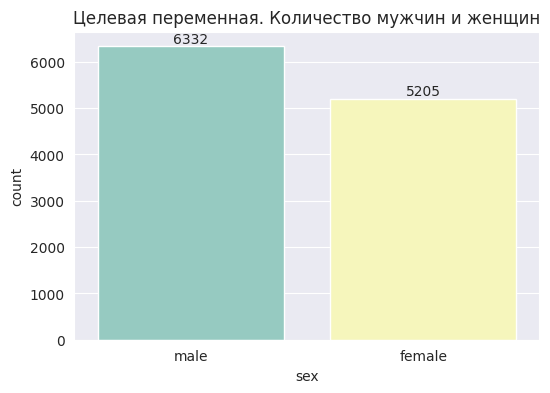

In [28]:
plt.figure(figsize=(6, 4))
sns.set_style('darkgrid')
chart = sns.countplot(data=df, hue='sex', x='sex', palette='Set3')
chart.bar_label(chart.containers[0])
chart.bar_label(chart.containers[1])
plt.title('Целевая переменная. Количество мужчин и женщин');

In [29]:
from sklearn.model_selection import train_test_split

In [30]:
x_train, x_test, y_train, y_test = train_test_split(df_x, Y, train_size=0.8, random_state=1982, stratify=Y)

### Стандартизация признаков

In [31]:
from sklearn.preprocessing import StandardScaler

In [32]:
SSc = StandardScaler()

In [33]:
x_train_standard = SSc.fit_transform(x_train)
x_test_standard = SSc.fit_transform(x_test)

### **Модель**

In [34]:
LR = LogisticRegression(class_weight='balanced')

In [35]:
LR.fit(x_train_standard, y_train)

LogisticRegression(class_weight='balanced')

In [36]:
y_predict_train = LR.predict(x_train_standard)
y_predict_test = LR.predict(x_test_standard)

### Метрики

In [37]:
accuracy_train = metrics.accuracy_score(y_train, y_predict_train)
accuracy_test = metrics.accuracy_score(y_test, y_predict_test)
print(f'Точность обучающей выборки: {accuracy_train}')
print(f'Точность тестовой выборки: {accuracy_test}')

Точность обучающей выборки: 0.8237078773431574
Точность тестовой выборки: 0.8253899480069324


Actual_Мужчин: 1041
Actual_Женщин: 1267


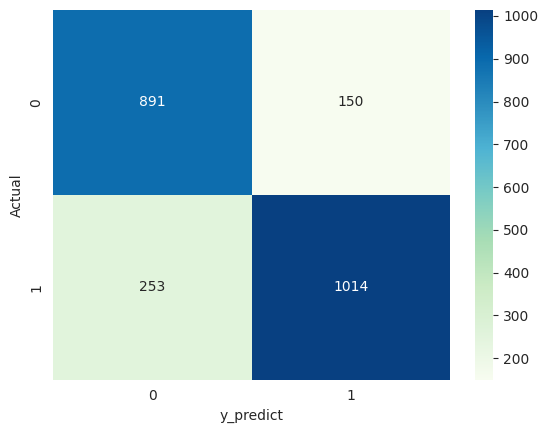

In [38]:
# МАТРИЦА ОШИБОК
print(f'Actual_Мужчин: {y_test.value_counts()[0]}')
print(f'Actual_Женщин: {y_test.value_counts()[1]}')
CM = metrics.confusion_matrix(y_test, y_predict_test)
sns.heatmap(CM, annot=True, fmt='', cmap='GnBu')
plt.ylabel('Actual')
plt.xlabel('y_predict');

In [39]:
print(f'Отчёт классификации:\n{metrics.classification_report(y_test, y_predict_test)}')

Отчёт классификации:
              precision    recall  f1-score   support

           0       0.78      0.86      0.82      1041
           1       0.87      0.80      0.83      1267

    accuracy                           0.83      2308
   macro avg       0.82      0.83      0.82      2308
weighted avg       0.83      0.83      0.83      2308



In [40]:
precision_0 = metrics.precision_score(y_test, y_predict_test, pos_label=0)
precision_1 = metrics.precision_score(y_test, y_predict_test, pos_label=1)
recall_0 = metrics.recall_score(y_test, y_predict_test, pos_label=0)
recall_1 = metrics.recall_score(y_test, y_predict_test, pos_label=1)
print(f'Расчёт precision для класса 0 (мужчины): {precision_0}\n'
      f'Расчёт precision для класса 1 (женщины): {precision_1}\n'
      f'Расчёт recall для класса 0 (мужчины): {recall_0}\n'
      f'Расчёт recall для класса 1 (женщины): {recall_1}\n')

Расчёт precision для класса 0 (мужчины): 0.7788461538461539
Расчёт precision для класса 1 (женщины): 0.8711340206185567
Расчёт recall для класса 0 (мужчины): 0.8559077809798271
Расчёт recall для класса 1 (женщины): 0.8003157063930545



## **3. Постройте ROC-кривую с помощью функции roc_curve из библиотеки sklearn.metrics.**

###  ROC-кривая

In [41]:
#Доступ модели к предсказанным(вероятности) меткам
prediction = LR.predict_proba(x_test_standard)
prediction[:5]

array([[0.41339074, 0.58660926],
       [0.2691631 , 0.7308369 ],
       [0.25534169, 0.74465831],
       [0.02468213, 0.97531787],
       [0.41322205, 0.58677795]])

In [42]:
prediction[1]

array([0.2691631, 0.7308369])

In [43]:
# В качестве аргументов функции roc_curve: правельные ответы - y_test  и вероятности пренадлежности к какому-либо классу( в данном случае 1 - женщины)
fpr, tpr, thresh = metrics.roc_curve(y_test, prediction[:,1])

0.89923818015432


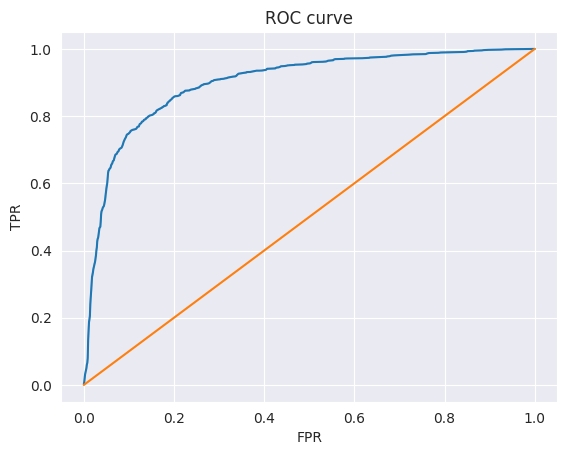

In [44]:
auc_ = metrics.auc(fpr, tpr)
print(auc_)

sns.lineplot(x=fpr, y=tpr)
sns.lineplot(x=np.linspace(0, 1, 10), y=np.linspace(0, 1, 10))
plt.title('ROC curve')
plt.xlabel('FPR')
plt.ylabel('TPR');

### Precision-Recall Curve

In [45]:
pr, re, threshold_ = metrics.precision_recall_curve(y_test, prediction[:, 1])

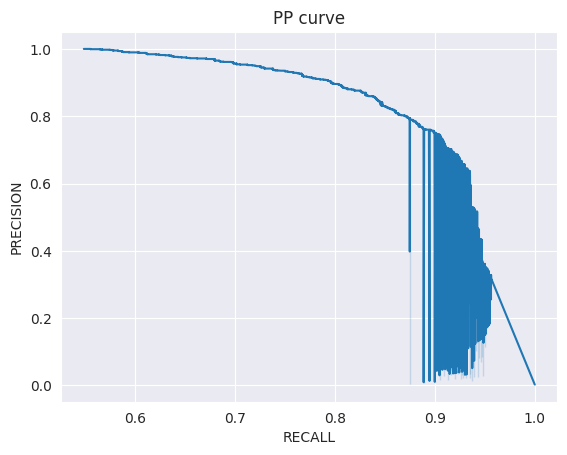

In [46]:
sns.lineplot(x=pr, y=re)
plt.title('PP curve')
plt.xlabel('RECALL')
plt.ylabel('PRECISION');

## **4. Вычислите значение ROC-AUC метрики с помощью функции roc_auc_score из библиотеки sklearn.metrics**.

In [47]:
auc_1 = metrics.roc_auc_score(y_test, prediction[:, 1])
print(f'Площадь под ROC кривой: {auc_1}')

Площадь под ROC кривой: 0.89923818015432


In [48]:
# Вотрой вариант
metrics.auc(fpr, tpr)

0.89923818015432

## **5. Реализуйте подсчет метрик TPR, FPR «вручную», без использования готовых функций из библиотеки sklearn.**

In [49]:
probability = LR.predict_proba(x_test_standard) # СТАНДАРТИЗОВАННЫЕ ДАННЫЕ

### 1 Вариант. Через цикл

In [50]:
TP = 0 # True positive
FP = 0 # False positive
FN = 0 # False negative
TN = 0 # True negative


for predicted_prob, actual in zip(probability[:, 1], y_test):
    if predicted_prob > 0.5:
        predicted = 1
    else:
        predicted = 0

    if predicted == 1 and actual ==1:
        TP += 1
    if predicted == 0 and actual ==0:
        TN += 1
    if predicted == 1 and actual ==0:
        FP += 1
    if predicted == 0 and actual ==1:
        FN += 1

# при thresh 0.5
TP, FP, FN, TN

(1014, 150, 253, 891)

### 2 Вариант. Сформирован DataFrame

In [51]:
df_probability = pd.DataFrame({'probability': probability[:, 1], 'y_predict': y_predict_test, 'aclual': y_test})
df_probability.head()

,probability,y_predict,aclual
6046,0.586609,1,0
9067,0.730837,1,1
6513,0.744658,1,0
3893,0.975318,1,1
3442,0.586778,1,1


In [52]:
threshold_1 = np.linspace(0, 1, 100)

TPR_list = []
FPR_list = []

for thresh_proba in threshold_1:
  tn = len(df_probability.loc[(df_probability['probability']<thresh_proba) & (df_probability['aclual']==0)])
  tp = len(df_probability.loc[(df_probability['probability']>thresh_proba) & (df_probability['aclual']==1)])
  fn = len(df_probability.loc[(df_probability['probability']<thresh_proba) & (df_probability['aclual']==1)])
  fp = len(df_probability.loc[(df_probability['probability']>thresh_proba) & (df_probability['aclual']==0)])

  TPR = tp/(tp+fn)
  FPR = fp/(fp+tn)

  TPR_list.append(TPR)
  FPR_list.append(FPR)

## **6. Постройте ROC-кривую с помощью вычисленных в п. 5 метрик. Объедините графики из п. 3 и п. 6 в один. Сравните, сделайте вывод.**

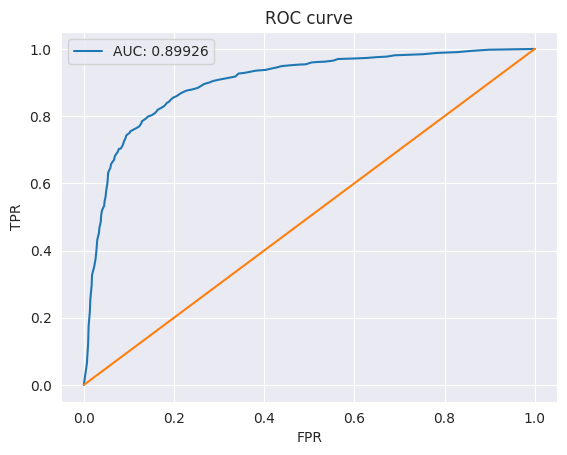

In [53]:
auc_roc = round(metrics.auc(FPR_list, TPR_list), 5)

sns.lineplot(x=FPR_list, y=TPR_list, label=(f'AUC: {auc_roc}'))
sns.lineplot(x=np.linspace(0, 1, 10), y=np.linspace(0, 1, 10))
plt.title('ROC curve')
plt.legend()
plt.xlabel('FPR')
plt.ylabel('TPR');

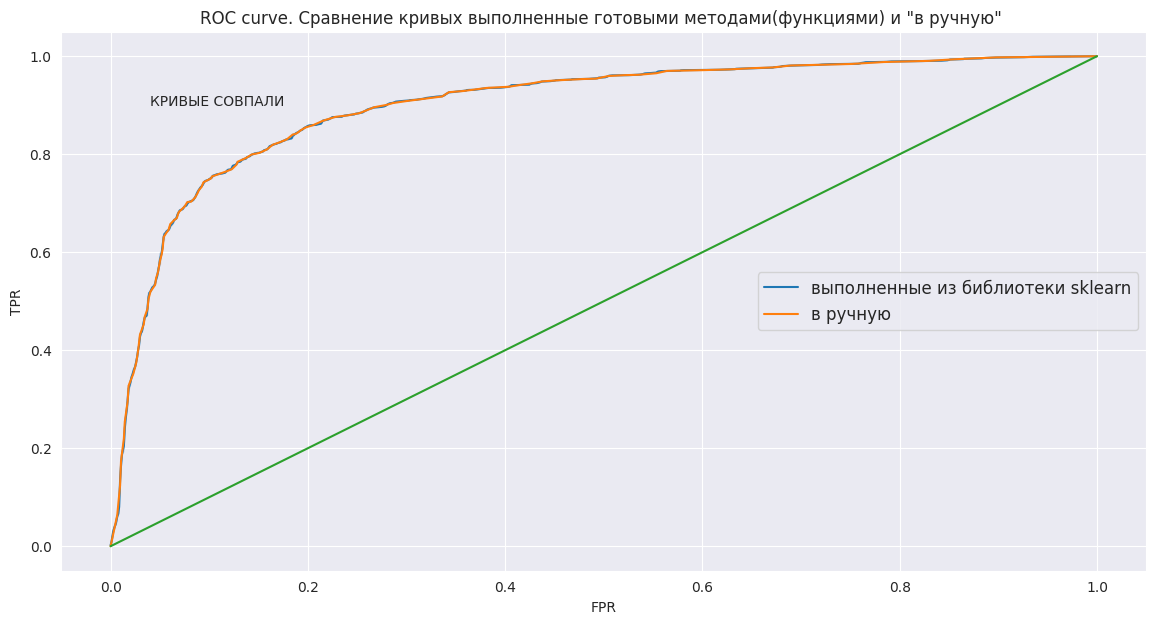

In [54]:
plt.figure(figsize=(14, 7))
sns.lineplot(x=fpr, y=tpr, label='выполненные из библиотеки sklearn')
sns.lineplot(x=FPR_list, y=TPR_list, label='в ручную')
sns.lineplot(x=np.linspace(0, 1, 10), y=np.linspace(0, 1, 10))
plt.legend(loc='center right', fontsize=12)
plt.title('ROC curve. Сравнение кривых выполненные готовыми методами(функциями) и "в ручную" ')
plt.text(0.04, 0.9, 'КРИВЫЕ СОВПАЛИ')
plt.xlabel('FPR')
plt.ylabel('TPR');


In [55]:
print(len(thresh))
print(len(threshold_1))

630
100


КРИВЫЕ СОВПАЛИ. Для более точной ручной интерпретации требуется увеличить количество threshold(уменьшить шаг). На ручной кривой threshold настроен каждые 0.01 (100). Из библиотеки threshold - 630

## **7. Постройте график Precision-Recall**

In [56]:
threshold_1 = np.linspace(0, 0.9, 100)

TPR_list = [] # recall
PR_list = []  # precision

for thresh_proba in threshold_1:
  tn = len(df_probability.loc[(df_probability['probability']<thresh_proba) & (df_probability['aclual']==0)])
  tp = len(df_probability.loc[(df_probability['probability']>thresh_proba) & (df_probability['aclual']==1)])
  fn = len(df_probability.loc[(df_probability['probability']<thresh_proba) & (df_probability['aclual']==1)])
  fp = len(df_probability.loc[(df_probability['probability']>thresh_proba) & (df_probability['aclual']==0)])

  TPR = tp/(tp+fn)
  PR = tp/(tp+fp)

  TPR_list.append(TPR)
  PR_list.append(PR)

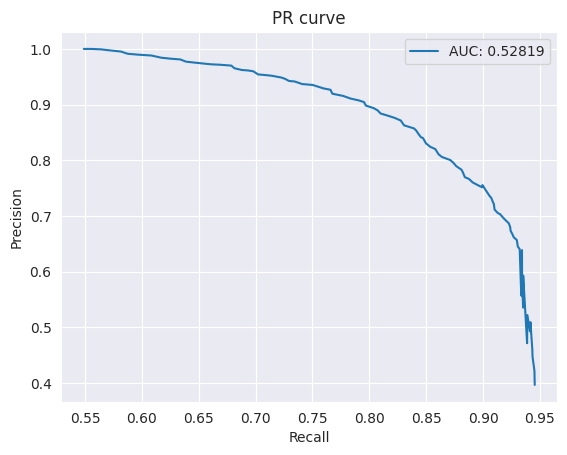

In [57]:
auc_pr = round(metrics.auc(TPR_list, PR_list),5)

sns.lineplot(x=PR_list, y=TPR_list, label=(f'AUC: {auc_pr}'));
plt.title('PR curve')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.legend();

### 2 Вариант. НЕ ПОЛУЧЕТСЯ РЕАЛИЗОВАТЬ. МНЕ КАЖЕТСЯ ОШИБОЧНЫЙ КОД::

In [70]:
tp = 0
tn = 0
fp = 0
fn = 0

prob_1_class = LR.predict_proba(x_test_standard)[:,1] # предсказания для 1 класса

threshold_2 = np.linspace(0, 1, 10) # выбранные пороги

precision_list, recall_list = [], [] # списки результатов в зависимости от порога

tuple_info = tuple(zip(prob_1_class, y_test)) # кортеж с предсказаниями 1 класса и классы y_test



for thresh_2 in threshold_2:
  for prob, aclual_ in tuple_info:
    if prob > thresh_2:
      proba=1
    else:
      proba=0

    if proba==0 and aclual_==0:
      tn+=1
    if proba==1 and aclual_==1:
      tp+=1
    if proba==0 and aclual_==1:
      fn+=1
    if proba==1 and aclual_==0:
      fp+=1

    if tp+fp==0:
      precision=1
    elif tp+fn==0:
      recall=1
    else:
      recall = tp/(tp+fn)
      precision = tp/(tp+fp)


  precision_list.append(precision)
  recall_list.append(recall)

In [73]:
recall_list

[1.0,
 0.9877663772691397,
 0.9747434885556433,
 0.9561957379636937,
 0.9329123914759274,
 0.9048934490923441,
 0.8746194610440862,
 0.8398776637726914,
 0.7945277558537227,
 0.7150749802683505]

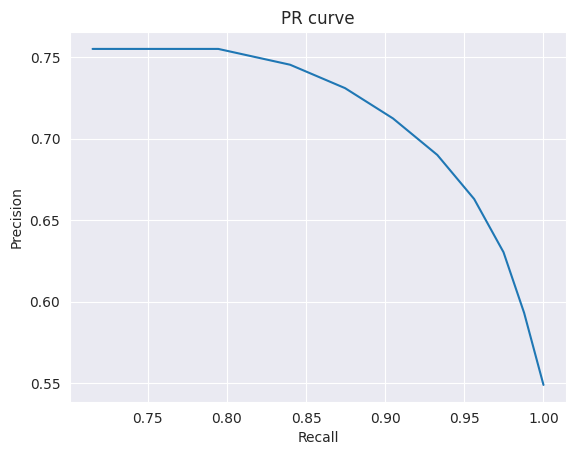

In [74]:
sns.lineplot(x=recall_list, y=precision_list);
plt.title('PR curve')
plt.xlabel('Recall')
plt.ylabel('Precision');

## **8. Вычислите значение ROC-AUC метрики, используя метрики, посчитанные в п. 5.**

In [118]:
# НЕ ПОНИМАЮ КАК ПОСЧИТАТЬ ПЛОЩАДЬ ВРУЧНУЮ. ВЕДЬ это ИНТЕГРАЛ.

## **9. Сформулируйте выводы по проделанной работе:**

In [119]:
# a) как по полученным графикам сделать вывод о качестве модели? Как вы оцениваете обученную модель исходя из подсчитанных метрик?

""" Получилась хорошая модель. Площадь под ROC кривой: 0.89923818015432. Площадь под P-R кривой: ~0,53
Recall (TPR) для позитивного класса (1) получился 0.8 - 80% доля правильно классифицированных объектов положительного класса (1) среди тестовой группы - y_test.
FPR - получился 14,4 - 14,4% - доля ложно положительных объектов среди тестовой группы - y_test или как доля истинно - отрицательных обектов,
которые неправильно классифицированны моделью среди тестовой группы - y_test.
"""

' Получилась хорошая модель. Площадь под ROC кривой: 0.89923818015432. Площадь под P-R кривой: ~0,53\nRecall (TPR) для позитивного класса (1) получился 0.8 - 80% доля правильно классифицированных объектов положительного класса (1) среди тестовой группы - y_test.\nFPR - получился 14,4 - 14,4% - доля ложно положительных объектов среди тестовой группы - y_test или как доля истинно - отрицательных обектов,\nкоторые неправильно классифицированны моделью среди тестовой группы - y_test.\n'

In [120]:
# б) может ли ROC-кривая проходить ниже диагонали
"""Может, если модель предсказывает классы наоборот.
"""

'Может, если модель предсказывает классы наоборот.\n'